## OLS

Based on the book master learning algorithms and data science from scracth  I'm attempting to implement from scratch with python machine learning algorithms. 
I'm focusing here on the pseudocode of running the algorithms. 
My objective is to make this code readable and functional. 
I'm not concerned with vectorization and faster implementation 

In [170]:
# test data m is 2 and b is 1
data_test = [(x, 2 * x + 1) for x in range(10)]
xs = [x for x, _ in data_test]
ys = [y for _, y in data_test]

First I will attempt to find the regression coefficients via the OLS method.

m = sum((xi - mean(x)) * (yi - mean(y))) / sum(xi - mean(x)) ** 2

b = mean(y) - m * mean(x)

our hypothesis function is 

y = b + m*x

In [171]:
from typing import List, Tuple
import math

Vector = List[float]

def mean (inputs: Vector) -> float:
    """computes the mean of the vector"""
    assert inputs, "cannot compute the mean of an empty vector"
    return sum(inputs)/ len(inputs)

def de_mean(inputs: Vector) -> float:
    """
    substracts the mean of inputs to each element
    """
    mean_inputs = mean(inputs)
    return [input - mean_inputs for input in inputs]

In [172]:
assert -0.001 <mean(de_mean(xs)) < 0.001 # mean should be close to 0

In [173]:
def _slope(xs: Vector, ys: Vector) -> float:
    """computes the slope for OLS simple regression"""
    return sum(xi * yi 
               for xi, yi in zip(de_mean(xs), de_mean(ys))) / sum(xi ** 2 for xi in de_mean(xs))

def _intercept(xs: Vector, ys: Vector) -> float:
    """ computes the intercept term for OLS simple regression"""
    m = _slope(xs, ys)
    return mean(ys) - m * mean(xs)

def ols (xs: Vector, ys: Vector) -> Tuple:
    """ computes and returns the intercept and slope for OLS simple regression"""
    return _intercept(xs, ys), _slope(xs, ys)

In [174]:
b, m = ols(xs, ys)
b, m

(1.0, 2.0)

In [175]:
assert 0.99 < b < 1.01
assert 1.99 < m < 2.01

#### Comparable example

Using the example in simple linear regression for DSfS book I will try to create a OLS and gradient descent example below
for reference correct result should be theta_0 ~ 22.9, theta_1 ~ 0.9

In [176]:
import random


# imported the below data so my results are comparable to dsfs book : simple liner regression implementation  
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [177]:
# removal of outlier

outlier = num_friends.index(100)

num_friends_good = [friends
                    for idx, friends in enumerate(num_friends)
                    if idx != outlier]

daily_minutes_good = [minutes
                     for idx, minutes in enumerate(daily_minutes)
                     if idx != outlier]

In [178]:
b, m = ols(num_friends_good, daily_minutes_good)

assert 22.9 < b < 23.0
assert 0.9 < m < 0.905
b, m

(22.94755241346903, 0.9038659456058649)

In [179]:
# y_hat-  the predict values
def predict(xs:Vector, ys: Vector, b: float, m: float ) -> float:
    return [xi * m + b for xi in xs ]

assert len (predict(xs, ys, b, m)) == len(ys)

In [180]:
# estimating the error
# here we used the root mean squared error

def subtract(v1: Vector, v2: Vector) -> float:
    assert len(v1) == len(v2)
    return [v1_i - v2_i for v1_i, v2_i in zip(v1, v2)]

def root_mean_squared_error(ys: Vector, y_hat: Vector) -> float:
    assert len(ys) == len(y_hat)
    n = len(ys)
    return  math.sqrt(sum(error ** 2 for error in subtract(y_hat, ys)) / n)

In [181]:
y_hat = predict(num_friends_good, daily_minutes_good, b, m) # predict values y_hat
root_mean_squared_error(daily_minutes_good, y_hat)

8.062752435241086

## Stochastic gradient descent

Now I'm implementing to implement stochastic gradient descent for the same set of data. Stochastic gradient descent is not used to calculate the coefficients for linear regression in
practice unless the dataset prevents traditional Ordinary Least Squares being used (e.g. a very large dataset). 

Nevertheless, linear regression does provide a useful exercise for practicing
stochastic gradient descent which is an important algorithm used for minimizing cost functions
by machine learning algorithms.

**NOTE** Feature scaling is assumed not to be required in this example

Each iteration the coefficients, called weights (w) in machine
learning language are updated using the equation:

 w = w  -  alpha * delta 

where delta is: 

delta = derivative (costs) 


Where w is the coefficient or weight being optimized, alpha is a learning rate that you must
configure (e.g. 0.1) and gradient is the error for the model on the training data attributed to
the weight.

Our hypothesis function is:

y = w_0 + w_1 * x

In [182]:
# predict the error per point
def predict_point(x: float, w_0: float = 0.0, w_1: float = 0.0) -> float:
    return w_0 + w_1 * x 

def error_point(x: float, y: float, w_0: float = 0.0 , w_1: float = 0.0) -> float:
    """ Calculates the prediction error at point x"""
    return predict_point(x, w_0, w_1) - y

In [183]:
assert error_point(0, 1) == -1

In [184]:
# calculate the derivatives of the costs for both weights and update 

alpha = 0.01 # set initial learning rate
def _update_w0(x: float, y: float, w_0: float,w_1: float, alpha: float) -> float:
    """Update w0, we will use just the error as the gradient"""
    return w_0 - alpha * error_point(x, y, w_0, w_1)

def _update_w1(x: float, y: float, w_0: float,w_1: float, alpha: float) -> float:
    """Update w1, the error is filtered by the input x that caused it"""
    return w_1 - alpha * error_point(x, y, w_0, w_1) * x

def update_W(x: float, y: float, w_0: float,w_1: float, alpha: float) -> Tuple[float]:
    """ Update w_0 and w_1 in one step"""
    return _update_w0(x, y, w_0, w_1, alpha), _update_w1(x, y, w_0, w_1, alpha)

In [185]:
w_0, w_1 = (0, 0) # test only
assert update_W(1, 1, w_0, w_1, 0.01) == (0.01, 0.01)

In [186]:
import itertools

In [187]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_loss(data: List[Tuple[int, float]]) -> None:
    """ Plots error vs epoch """
    
    epochs = [epoch for epoch, _ in data]
    loss = [error for _, error in data]
    
    plt.plot(epochs, loss , color='green', marker='o', linestyle='solid')
    # add a title
    plt.title("loss vs epoch")
    # add a label to the x and y-axis
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.show()
    return None

In [188]:
def stochastic_gradient_descent(xs: List[float], ys: List[float], alpha: float,  epochs: int = 20) -> Tuple[float]:
    """update of vectors weights w_0 and w_1 with stochastic gradient descent"""
    
    w_0, w_1 = (random.random(), random.random()) # initialize thetas randomly   
    loss = [] 
    data = [(x,y) for x, y in zip(xs, ys)] # (x, y) pairs
    data_copy = data.copy()
    
    for epoch in range(epochs):
        random.shuffle(data_copy) # shuffle the entries prior to an epoch
        for x, y in data_copy:
            w_0, w_1 = update_W(x, y, w_0,w_1, alpha)
            loss.append((epoch, error_point(x, y, w_0, w_1)))
    plot_loss(loss)
    return w_0, w_1

In [189]:
b, m

(22.94755241346903, 0.9038659456058649)

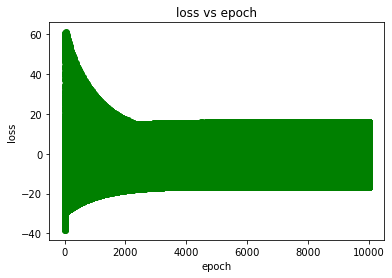

(22.94751856120152, 0.9043909806639854)

In [190]:
random.seed(0)
theta_0, theta_1 = stochastic_gradient_descent(num_friends_good, 
                                               daily_minutes_good, alpha = 0.00001, epochs= 10000)
assert 22.9 < theta_0 < 22.97
assert 0.90 < theta_1 < 0.95
theta_0, theta_1

### Batch gradient descent

Now I will try to implement a batch version of gradient descent.  I've update the gradient functions below
not these will only work for a simple liner regression
beyond that proably best to use numpy

In [191]:
# helper function for gradient update 

def add(v1: Vector, v2: Vector) -> Vector:
    """adds 2 vectors of equal length"""
    assert len(v1) == len(v2)
    return [v1_i + v2_i for v1_i, v2_i in zip(v1, v2)]

assert add([1, 2], [-1, -2]) == [0, 0]

def scalar_multiply(s: float, v1: Vector) -> Vector:
    return [v1_i * s for v1_i in v1]

assert scalar_multiply(2, [1, 2]) == [2, 4]

In [192]:
def sum_sq_error(data: List[Vector], w_0: float, w_1: float) -> float:
    """Computer sum of square error for all xs, ys pairs """
    return sum(error_point(x, y, w_0, w_1) ** 2 for x, y in data)
    
def _gradient_0(x: int, y: int, w_0: float, w_1: float) -> float:
    """Calculates the gradient update for 1 point for theta 1 param"""
    return error_point(x, y, w_0, w_1)

def _gradient_1(x: int, y: int, w_0: float, w_1: float) -> float:
    """Calculates the gradient update for 1 point for theta 1 param"""
    return error_point(x, y, w_0, w_1) *  x

def gradient_step(grad_0: float, grad_1: float, alpha: float) -> Vector:
    """ takes one gradient step"""
    return scalar_multiply(alpha, [grad_0, grad_1])

def gradient_update(w_0: float, w_1: float, grad_0: float, grad_1: float, alpha: float) -> Vector:
    return add([w_0, w_1], gradient_step(grad_0, grad_1, -alpha))

In [193]:
theta_0, theta_1 = gradient_update(1, 1, 1, 1, 0.01)
assert 0.985 < theta_0 < 0.995 
assert 0.985 < theta_1 < 0.995 
theta_0, theta_1

(0.99, 0.99)

In [194]:
def batch_gradient_descent(xs: List[float], ys: List[float] , alpha: float,  epochs: int = 20) -> Tuple[float]:
    """update of vectors weights w_0 and w_1 with batch gradient descent"""
    
    w_0, w_1 = (random.random(), random.random()) # initialize W randomly  
    data = [(x,y) for x, y in zip(xs, ys)] # (x, y) pairs
    data_copy = data.copy() # defensive data copy not used
    loss = [] 
    m = len(data_copy)
    
    for epoch in range(epochs):
        grad_0 = sum(_gradient_0(x, y, w_0, w_1) for x, y in data_copy)
        grad_1 = sum(_gradient_1(x, y, w_0, w_1) for x, y in data_copy)
        w_0, w_1 = gradient_update(w_0, w_1, grad_0, grad_1, alpha)
        epoch_loss = (1/ (2 * m)) * sum_sq_error(data_copy, w_0, w_1)
        loss.append((epoch, epoch_loss))
    plot_loss(loss)
    return w_0, w_1

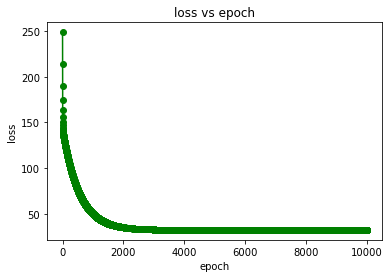

(22.945162119011258, 0.9040573579394636)

In [195]:
# i've had to look into results as previous rate was to high and nan results were generated. 
# decrease rate for a smoother loss curve
learning_rate = 0.00001 
random.seed(0)
theta_0, theta_1 = batch_gradient_descent(num_friends_good, daily_minutes_good,  learning_rate, 10000)

theta_0, theta_1

In [196]:
#
# Now mini-batch gradient descent
# same principle generating chunks of data
def chunks(data: Vector, chunk_size):
    """Yield successive chunks from data."""
    chunk_size = max(1, chunk_size)
    for i in range(0, len(data), chunk_size):
        yield data[i:i + chunk_size]

In [197]:
def mini_batch_gradient_descent(xs: List[float], ys: List[float] , alpha: float, chunk_size: int=10, epochs: int=1000) -> Tuple[float]:
    """update of vectors weights w_0 and w_1 with mini-batch gradient descent"""
    
    w_0, w_1 = (random.random(), random.random()) # initialize W randomly  
    data = [(x,y) for x, y in zip(xs, ys)] # (x, y) pairs
    data_copy = data.copy() # create a data copy
    loss =[]
    
    for epoch in range(epochs):
        chunks_loss = [] # chunk loss to be used per epoch
        for chunk in chunks(data_copy, chunk_size):
            # calculate grads for theta
            grad_0 = sum(_gradient_0(x, y, w_0, w_1) for x, y in chunk)
            grad_1 = sum(_gradient_1(x, y, w_0, w_1) for x, y in chunk)
            # update weights
            w_0, w_1 = gradient_update(w_0, w_1, grad_0, grad_1, alpha)
            
            # now compute loss per chunk and append
            m = len(chunk)
            loss_per_chunk = (1/ (2 * m)) * sum_sq_error(data_copy, w_0, w_1)
            chunks_loss.append(loss_per_chunk)
        # average chunk loss at the end of an epoch and append for plotting
        average_epoch_loss = sum(chunks_loss) / len(chunks_loss)
        loss.append((epoch, average_epoch_loss))
    plot_loss(loss)
    return w_0, w_1

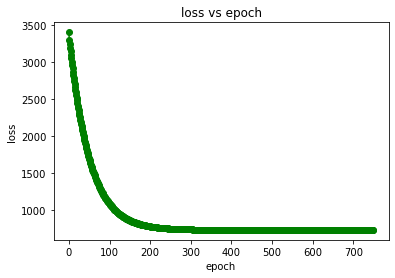

(22.931749564280853, 0.9035572883550291)

In [198]:
learning_rate = 0.0001
chunk_size = 10
epochs = 750
random.seed(0)
theta_0, theta_1 = mini_batch_gradient_descent(num_friends_good, daily_minutes_good, 
                                               learning_rate,
                                               chunk_size,
                                               epochs)
assert 22.9 < theta_0 < 22.95
assert 0.85 < theta_1 < 0.91
theta_0, theta_1

In [199]:
b, m

(22.94755241346903, 0.9038659456058649)

I will attemp a multivariate least squares fit in the next notebook based on bacth_gradiendednt descent update